# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).
To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [4]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [5]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#Explanation
#These functions are applied to normalize X by removing the mean value and dividing by the variance
#First, the fit function calculates the mean and the variance and then the standardscaler applies them

In [6]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [7]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # Define the model, with default params
mlp.fit(x_train, y_train) # Train the MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=3000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Train score:  0.9940765369322632
Test score:   0.9899773031580282


Text(0, 0.5, 'Loss')

Text(0, 0.5, 'f(examples)')

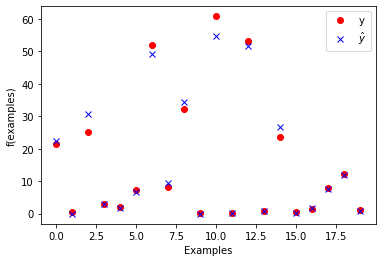

In [9]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

#Explanation :
#The red circles are the "real values" 
#The blue crosses are the ones predicted by the MLP

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.

- What is the structure of the network?  
<span style="color:blue">It is a neural network.</span>
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?  
<span style="color:blue">The default algorithm is 'adam'. The stochastic gradient descent (SGD) algorithm that we studied during the courses is also available.</span>
- How does the training algorithm decides to stop the training?  
<span style="color:blue">It stops when the maximum number of iterations is reached. If the early stoping is activated, it can also stop when no improvment is done to the validation score.</span>

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [10]:
# clean all previously defined variables for the sailing boats
%reset -f

In [11]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

num_samples = 2000 # Only use the first N samples to limit training time

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)[:num_samples]
y = cal_housing.target[:num_samples]

X.head(10) # print the first 10 values


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Extracting a subpart of the dataset for testing

- Split the dataset between a training set (75%) and a test set (25%)

Please use the conventional names `X_train`, `X_test`, `y_train` and `y_test`.

In [12]:
from sklearn import model_selection
# We will split the data after scaling them
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

 - Apply the standard scaler to both the training dataset (`X_train`) and the test dataset (`X_test`).
 - Make sure that **exactly the same transformation** is applied to both datasets.

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_validation, y_test, y_validation = model_selection.train_test_split(X_test, y_test, test_size=0.25, random_state=42)

#We did the standardization before splitting the data to ensure that exactly the same transformation is applied to both dataset.

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible.

- Propose a parameterization of the network (shape and learning parameters) that will maximize the train score (without considering the test score).

While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

- Is the **test** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.

In [14]:
from sklearn.neural_network import MLPRegressor

#Default parameters
mlp = MLPRegressor(max_iter=5000, random_state=1)
mlp.fit(X_train, y_train)
print("default parameters")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test), "\n")


#Increasing the max iterations number
# -> still the same score as the algorithm stops before reaching this max number of iterations
mlp = MLPRegressor(max_iter=10000, random_state=1)
mlp.fit(X_train, y_train)
print("increasing max_iter")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test), "\n")


#Increasing the number of iterations with no change (from default 10 to 100)
# -> The score increases too
mlp = MLPRegressor(max_iter=5000, random_state=1, n_iter_no_change=100)
mlp.fit(X_train, y_train)
print("increasing n_iter_no_change")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test), "\n")


#Adding layers and neurons in each layer
mlp = MLPRegressor(max_iter=5000, random_state=1, hidden_layer_sizes=(500,800))
mlp.fit(X_train, y_train)
print("icreasing hidden_layer_sizes")
print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test), "\n")

default parameters
Train score:  0.8452851538383562
Test score:   0.7375328102591283 

increasing max_iter
Train score:  0.8452851538383562
Test score:   0.7375328102591283 

increasing n_iter_no_change
Train score:  0.9076256338554253
Test score:   0.7485330155057166 

icreasing hidden_layer_sizes
Train score:  0.9054794103484964
Test score:   0.7658520507413025 



### Conclusion  
We can see that increasing n_iter_no_change or hidden_layer_sizes allow us to have a train score > 0.9. But when we increase the hidden_layer_sizes it takes more times to execute. 

**Definitions** : Overfitting means that *"our model doesn’t generalize well from our training data to unseen data"*.

**Answer to the questions :**
- Is the **test** score substantially smaller than the **train** score (indicator of overfitting) ?  
<span style="color:blue">The test score is way smaller than the train score. The test score is still between 0.75 and 0.78 even when we maximize the train score. </span>
- Explain how the parameters you chose allow the learned model to overfit.  
<span style="color:blue"> Here, the parameters we choose allow the learned model to overfit because we just change when the algorithm will stop or the size of hidden layers. So we allow our model to learn the nose too. For exemple when we add layers and neurons (when we increase the hidden_layer_sizes) we permits to the model to learn more, but in that way the model learn also the nose. But when a model do not distinct clearly the nose from the signal, it can provide good result on the test score. But, we think that a test score of 0.77 is not that bad for the begining. </span>

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **test** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/test score
- training time


Present in a table the various parameters tested and the associated results. You can find in the last cell of the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

### Definitions 
*from sklearn.neural_network.MLPRegressor documentation*  

- number and size of the hidden layers  
**hidden_layer_sizes** : The ith element represents the number of neurons in the ith hidden layer.  

- activation function  
**activation** : Activation function for the hidden layer.  

- stopping conditions  
**early_stopping** : Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as **validation** and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. Only effective when solver=’sgd’ or ‘adam’.  
**validation_fraction** : The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.  
**n_iter_no_change** : Maximum number of epochs to not meet tol improvement. Only effective when solver=’sgd’ or ‘adam’. 

- maximum number of iterations  
**max_iter** : Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.  

- initial learning rate value  
**learning_rate_init** : The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.


In [16]:
# TODO

import time
import random 

hidden_layer_sizes=[(100,),(250,400),(500,800),(750,1200)]
activation=['identity', 'logistic', 'tanh', 'relu']
early_stopping =[False,True]
validation_fonction=[0.1,0.2,0.3,0.4,0.5]
n_iter_no_change=[10,40,70,100]
max_iter=[1000,2500,5000]
learning_rate_init=[0.001,0.005,0.01,0.1]
data = []

#TOO MUCH TIME for all the possibilities !!!!
#for i in range(len(hidden_layer_sizes)): 
#    for j in range(len(activation)): 
#        for k in range(len(early_stopping)): 
#            for l in range(len(validation_fonction)): 
#                for m in range(len(n_iter_no_change)): 
#                    for n in range(len(max_iter)):
#                        for o in range(len(learning_rate_init)): 

for test in range(25):
    i=random.choice(hidden_layer_sizes)
    j=random.choice(activation)
    k=random.choice(early_stopping)
    l=random.choice(validation_fonction)
    m=random.choice(n_iter_no_change)
    n=random.choice(max_iter)
    o=random.choice(learning_rate_init)
    mlp = MLPRegressor(hidden_layer_sizes=i,
                       activation= j,
                        early_stopping = k,
                        validation_fraction=l,
                        n_iter_no_change=m,
                        max_iter= n, 
                        learning_rate_init=o            
                        )
    
    start = time.time()
    mlp.fit(X_train, y_train)
    stop = time.time()
                            
    data.append({'hidden_layer_sizes':i,
                 'activation':j,
                 'early_stopping': k, 
                 'validation_fraction':l,
                 'n_iter_no_change':m, 
                 'max_iter': n, 
                 'learning_rate_init':o, 
                 'validation_score': mlp.score(X_validation, y_validation),
                 'training time': stop - start
                })
    print("Test n°"+str(test)+" ok !")

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='validation_score', ascending=False)
table

Test n°0 ok !
Test n°1 ok !
Test n°2 ok !
Test n°3 ok !
Test n°4 ok !
Test n°5 ok !
Test n°6 ok !
Test n°7 ok !
Test n°8 ok !
Test n°9 ok !
Test n°10 ok !
Test n°11 ok !
Test n°12 ok !
Test n°13 ok !
Test n°14 ok !
Test n°15 ok !


C:\Users\morga\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test n°16 ok !
Test n°17 ok !


C:\Users\morga\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test n°18 ok !
Test n°19 ok !
Test n°20 ok !
Test n°21 ok !
Test n°22 ok !
Test n°23 ok !
Test n°24 ok !


,hidden_layer_sizes,activation,early_stopping,validation_fraction,n_iter_no_change,max_iter,learning_rate_init,validation_score,training time
6,"(250, 400)",relu,True,0.4,100,5000,0.001,0.816452,7.117100
12,"(500, 800)",relu,False,0.5,40,1000,0.005,0.807638,80.077527
3,"(250, 400)",relu,True,0.3,10,5000,0.010,0.799975,2.288840
5,"(100,)",tanh,False,0.4,70,5000,0.100,0.798727,1.032391
13,"(500, 800)",logistic,False,0.5,70,5000,0.010,0.790377,433.347729
21,"(250, 400)",tanh,True,0.4,100,5000,0.005,0.788263,8.188252
9,"(500, 800)",logistic,False,0.4,100,5000,0.010,0.785270,449.787747
18,"(100,)",logistic,False,0.1,40,1000,0.001,0.785041,6.272222
15,"(250, 400)",relu,False,0.3,10,2500,0.010,0.780960,2.741719
16,"(100,)",logistic,False,0.2,40,1000,0.001,0.779398,6.475277


## Evaluation

- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?

Unless you used cross-validation, you have probably used the "test" set to select the best model among the ones you experimented with.
Since your model is the one that worked best on the "test" set, your selection is *biased*.

In all rigor the original dataset should be split in three:

- the **training set**, on which each model is trained
- the **validation set**, that is used to pick the best parameters of the model 
- the **test set**, on which we evaluate the final model


Evaluate the score of your algorithm on a test set that was not used for training nor for model selection.



### Response

We already split our data set on 3 to have a training set, a validation set and a test set.   
25% of our initial dataset constitute the test set. And 25% of our train dataset constitute the validation test (0.1875 of the initial dataset). So the train dataset represent 0.5625 of the initial dataset.

From our experiments the best model seems to be 
```
MLPRegressor(hidden_layer_sizes=(250, 400),
                       activation= relu,
                        early_stopping = True,
                        validation_fraction=0.4,
                        n_iter_no_change=100,
                        max_iter=5000 , 
                        learning_rate_init=0.001            
                        )
```
With a validation score = 0.816452.  
We will now evalutate our model with the test set.

In [18]:
mlp = MLPRegressor(hidden_layer_sizes=(250, 400),
                        activation= 'relu',
                        early_stopping = True,
                        validation_fraction=0.4,
                        n_iter_no_change=100,
                        max_iter=5000 , 
                        learning_rate_init=0.001            
                        )

start = time.time()
mlp.fit(X_train, y_train)
stop = time.time()

print("Result")
print('Test score:  ', mlp.score(X_test, y_test), "\n")
    

Result
Test score:   0.7408860206482837 



### Conclusions

We have a final test score at 0.740 that is predictably less than previously but it still a very good score !